## __Problem Statement__


Most organizations today rely on email campaigns for effective communication with users. Email communication is one of the popular ways to pitch products to users and build trustworthy relationships with them.


Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the Click Through Rate (CTR).


CTR is a measure of success for email campaigns. The higher the click rate, the better your email marketing campaign is. CTR is calculated by the no. of users who clicked on at least one of the CTA divided by the total no. of users the email was delivered to.


CTR =   No. of users who clicked on at least one of the CTA / No. of emails delivered


CTR depends on multiple factors like design, content, personalization, etc. 



## __Importing the Necessary Libraries__

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, Lasso,RidgeCV, Ridge
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')     # Here we use filterwarning to ignore the unecessary warnings which may arise during execution

C:\Users\yadav\AppData\Roaming\Python\Python39\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## __Data Loading and Inspection__

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_train = pd.read_csv("train_F3fUq2S.csv")
df_test = pd.read_csv("test_Bk2wfZ3.csv")

* __Top 5 row to Training Dataset__

In [3]:
df_train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,0,14,0.142826


* __Top 5 rows of Test Dataset__

In [4]:
df_test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,3,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,2,40,0,0,0,0,0,0,0,0,14


In [5]:
print("Training Dataset size:- ",df_train.shape)
print("Test Dataset Size:- ", df_test.shape)

Training Dataset size:-  (1888, 22)
Test Dataset Size:-  (762, 21)


* __Here we clearly see that we have 1888 rows and 22 columns in Training Dataset whereas 762 rows and 21 Columns in Test Dataset.__

In [6]:
# Null Values in Training Dataset
df_train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [7]:
# Null Values in Test Dataset
df_test.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

In [8]:
print("Train Dataset:- ")
print("Number of Categorical variable:- ", df_train.select_dtypes(include=[np.object]).shape[1])
print("Number of Numerical variable:- ", df_train.select_dtypes(include=[np.int64, np.float64]).shape[1],"\n")

print("Test Dataset:- ")
print("Number of Categorical variable:- ", df_test.select_dtypes(include=[np.object]).shape[1])
print("Number of Numerical variable:- ", df_test.select_dtypes(include=[np.int64, np.float64]).shape[1])

Train Dataset:- 
Number of Categorical variable:-  1
Number of Numerical variable:-  21 

Test Dataset:- 
Number of Categorical variable:-  1
Number of Numerical variable:-  20


* __We have only 1 Categorical Feature__

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   campaign_id         762 non-null    int64 
 1   sender              762 non-null    int64 
 2   subject_len         762 non-null    int64 
 3   body_len            762 non-null    int64 
 4   mean_paragraph_len  762 non-null    int64 
 5   day_of_week         762 non-null    int64 
 6   is_weekend          762 non-null    int64 
 7   times_of_day        762 non-null    object
 8   category            762 non-null    int64 
 9   product             762 non-null    int64 
 10  no_of_CTA           762 non-null    int64 
 11  mean_CTA_len        762 non-null    int64 
 12  is_image            762 non-null    int64 
 13  is_personalised     762 non-null    int64 
 14  is_quote            762 non-null    int64 
 15  is_timer            762 non-null    int64 
 16  is_emoticons        762 no

* __The above information tell us that in the dataset we have three dtype of columns which are int, float, and object. And there is no missing value the both the datasets__

## __Data Preprocessing & Feature Engineering__

In [11]:
print("Categorical Value in Train Dataset Feature 'time_of_day':- ",df_train["times_of_day"].unique())
print("Categorical Value in Test Dataset Feature 'time_of_day':- ",df_test["times_of_day"].unique())

Categorical Value in Train Dataset Feature 'time_of_day':-  ['Noon' 'Morning' 'Evening']
Categorical Value in Test Dataset Feature 'time_of_day':-  ['Noon' 'Morning' 'Evening']


In [12]:
print("Train Dataset:- \n", df_train["times_of_day"].value_counts(), "\n")
print("Test Dataset:- \n", df_test["times_of_day"].value_counts())

Train Dataset:- 
 Evening    1317
Noon        447
Morning     124
Name: times_of_day, dtype: int64 

Test Dataset:- 
 Evening    532
Noon       175
Morning     55
Name: times_of_day, dtype: int64


In [13]:
df_train["times_of_day"].replace({"Evening": 0, "Noon": 1, "Morning": 2}, inplace = True)
df_test["times_of_day"].replace({"Evening": 0, "Noon": 1, "Morning": 2}, inplace= True)

* __We replace Evening, Noon, and Morning with 0,1,and 2. 0 with highest count value and 2 with lowest count value__

In [14]:
print("Train Dataset:- ",len(df_train["campaign_id"].unique()))
print("Test Dataset:- ", len(df_test["campaign_id"].unique()))

Train Dataset:-  1888
Test Dataset:-  762


In [15]:
df_train.drop(columns= ["campaign_id"], inplace=True)
df_test.drop(columns=["campaign_id"], inplace=True)

* __We drop Campaign_id because it the unique identifier which is not useful for model building__

## __Exploratory Data Analysis__

In [16]:
print("Columns in Train Dataset:-" ,df_train.columns)
print("Columns in Test Dataset:- ", df_test.columns)

Columns in Train Dataset:- Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'times_of_day', 'category', 'product',
       'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_timer', 'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience', 'click_rate'],
      dtype='object')
Columns in Test Dataset:-  Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'times_of_day', 'category', 'product',
       'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_timer', 'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience'],
      dtype='object')


In [17]:
# Descriptive Analytics
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sender,1888.0,4.395657,3.277927,0.0,3.000000,3.000000,3.000000,15.000000
subject_len,1888.0,86.246292,30.143206,9.0,69.000000,83.000000,98.000000,265.000000
body_len,1888.0,14185.780191,7327.615307,23.0,9554.500000,12689.000000,17351.500000,44491.000000
mean_paragraph_len,1888.0,35.239407,28.139498,4.0,21.000000,29.000000,40.000000,286.000000
day_of_week,1888.0,2.828390,1.763193,0.0,1.000000,3.000000,4.000000,6.000000
is_weekend,1888.0,0.199682,0.399867,0.0,0.000000,0.000000,0.000000,1.000000
times_of_day,1888.0,0.368114,0.603453,0.0,0.000000,0.000000,1.000000,2.000000
category,1888.0,9.949682,5.300719,0.0,6.000000,10.000000,15.000000,15.000000
product,1888.0,17.525424,12.369526,0.0,9.000000,12.000000,27.250000,43.000000
no_of_CTA,1888.0,4.222458,4.628348,0.0,2.000000,3.000000,5.000000,49.000000


In [18]:
val = len("mean_paragraph_len")
for i in df_train.columns:
    a = val- len(i)
    print(i," "*a, len(df_train[i].unique()))

sender              12
subject_len         170
body_len            1568
mean_paragraph_len  121
day_of_week         7
is_weekend          2
times_of_day        3
category            16
product             43
no_of_CTA           40
mean_CTA_len        79
is_image            6
is_personalised     2
is_quote            7
is_timer            1
is_emoticons        6
is_discount         2
is_price            8
is_urgency          2
target_audience     17
click_rate          1810


* __Count of unique value in each features__

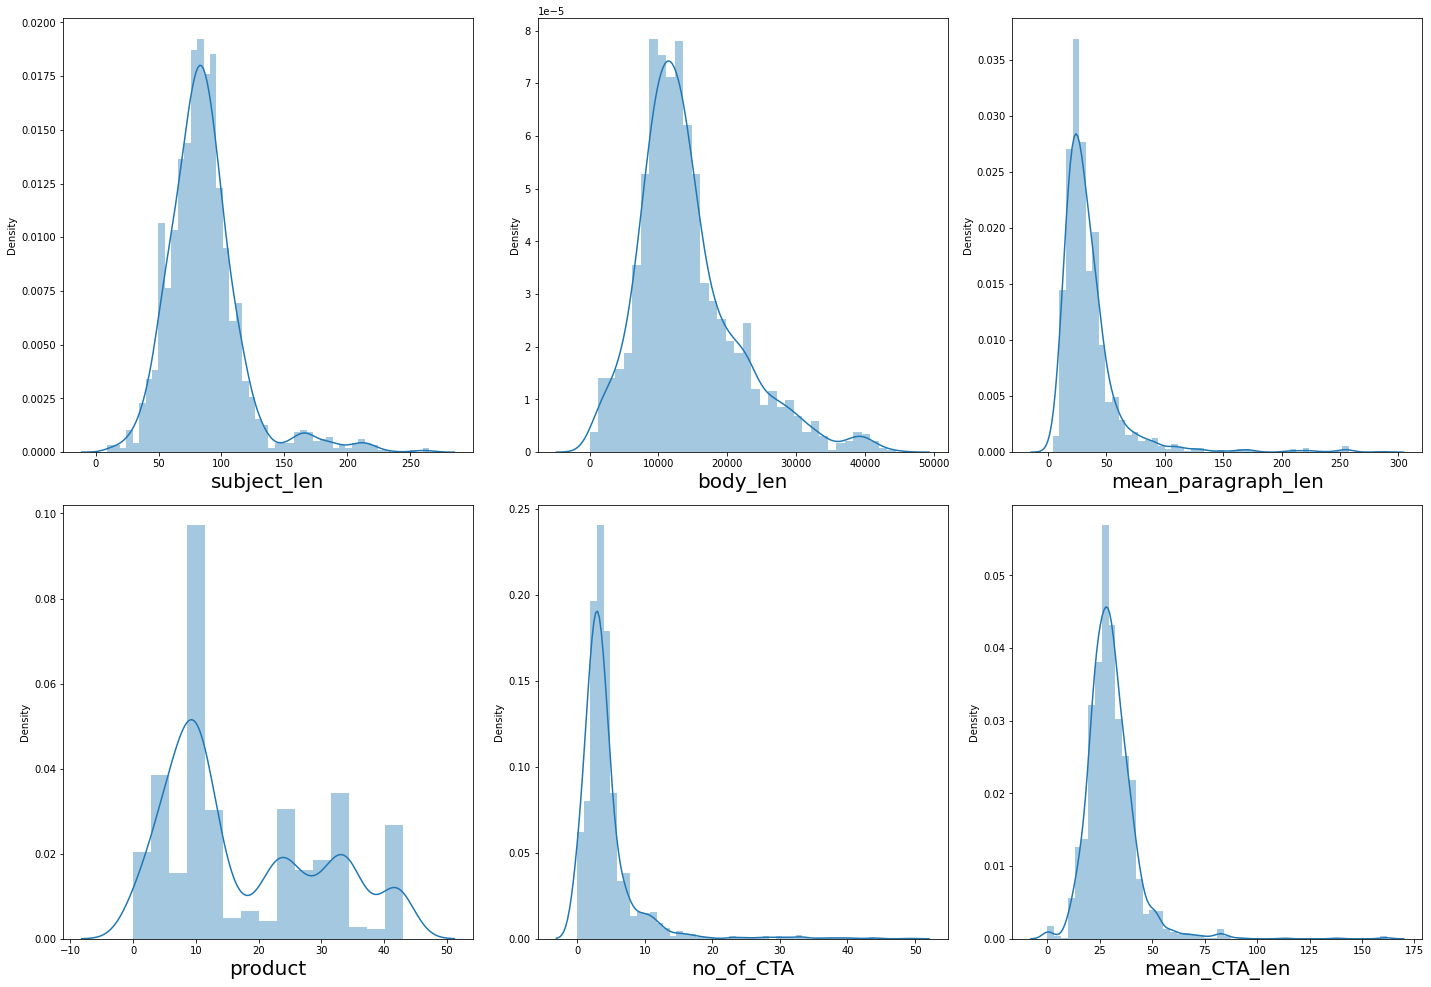

In [19]:
columns = ["subject_len","body_len","mean_paragraph_len","product","no_of_CTA","mean_CTA_len"]
plt.figure(figsize=(20,20), facecolor="white")
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,3, plotnumber)
    sns.distplot(df_train[column])
    plt.xlabel(column,fontsize=20)
    plotnumber += 1

plt.tight_layout()

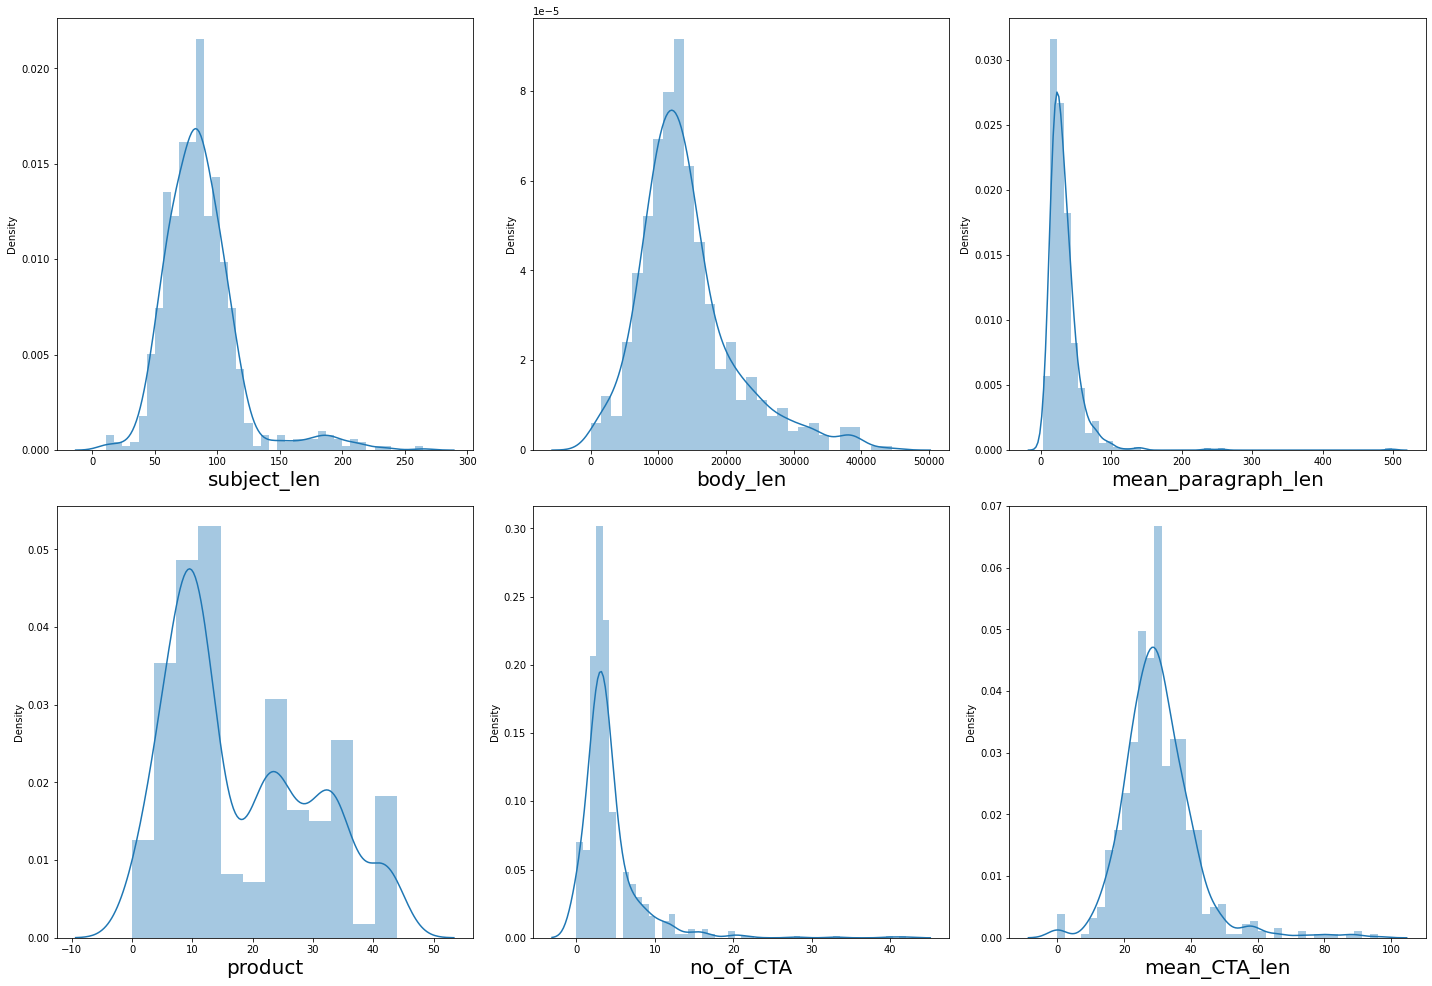

In [20]:
columns = ["subject_len","body_len","mean_paragraph_len","product","no_of_CTA","mean_CTA_len"]
plt.figure(figsize=(20,20), facecolor="white")
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,3, plotnumber)
    sns.distplot(df_test[column])
    plt.xlabel(column,fontsize=20)
    plotnumber += 1

plt.tight_layout()

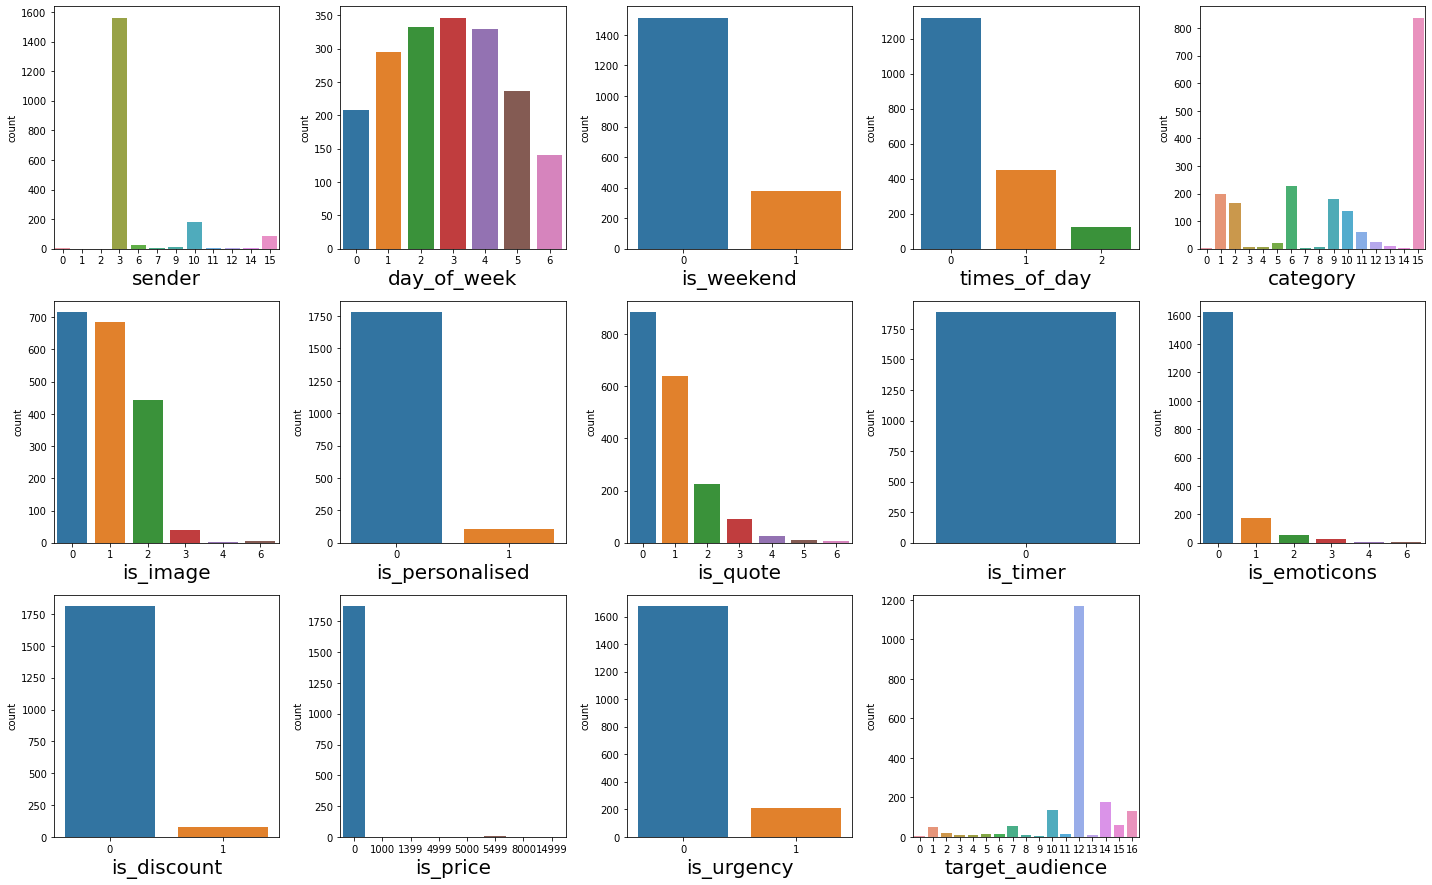

In [21]:
plt.figure(figsize=(20,20), facecolor="white")
plotnumber = 1
columns = ['sender','day_of_week', 'is_weekend', 'times_of_day',
       'category','is_image','is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience']
for column in columns:
    ax = plt.subplot(5,5, plotnumber)
    sns.countplot(df_train[column])
    plt.xlabel(column, fontsize = 20)
    plotnumber += 1

plt.tight_layout()

* __Train Dataset__

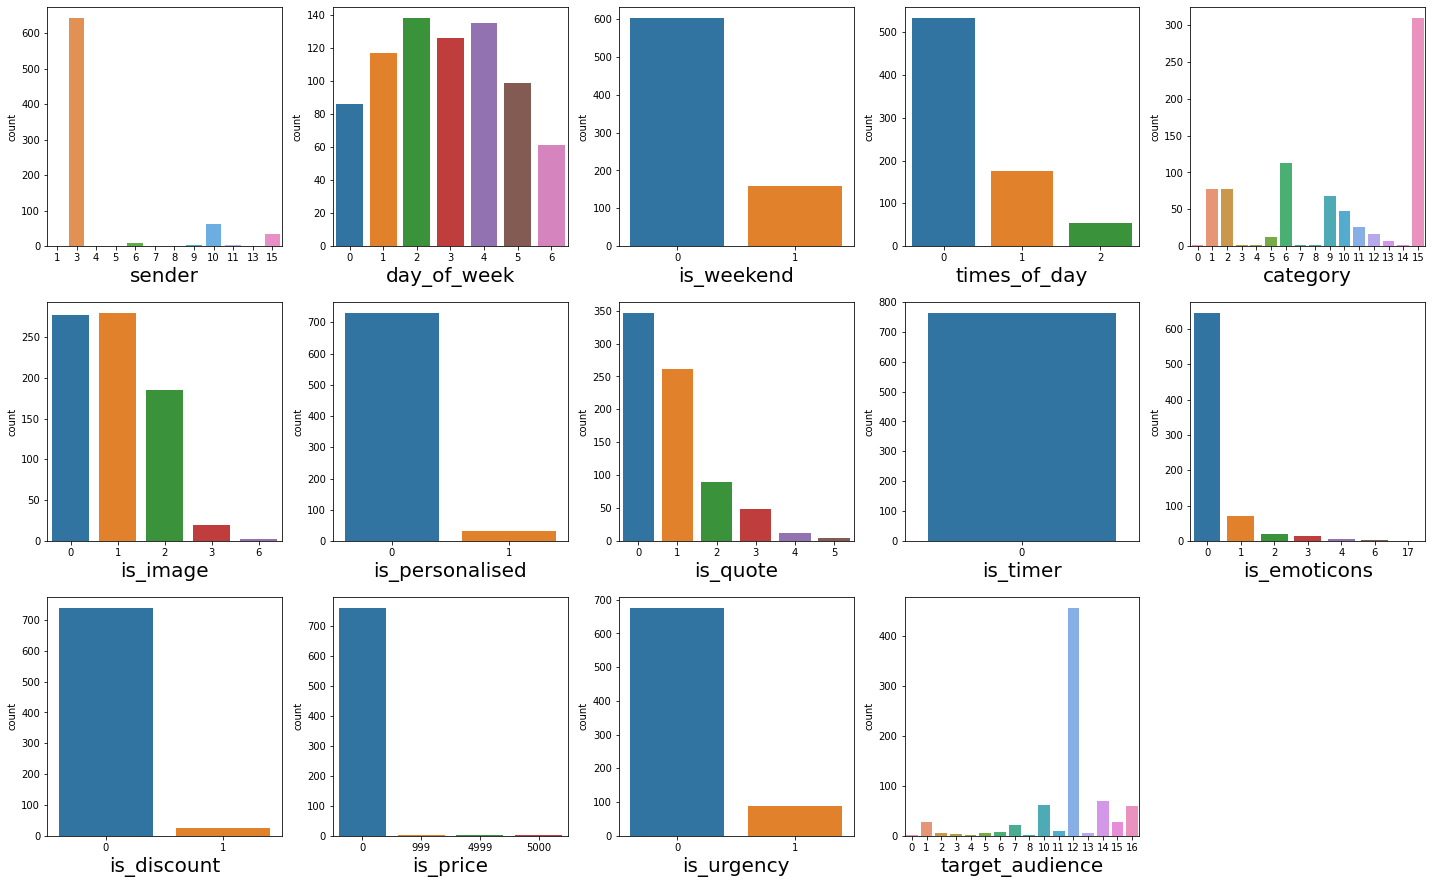

In [22]:
plt.figure(figsize=(20,20), facecolor="white")
plotnumber = 1
columns = ['sender','day_of_week', 'is_weekend', 'times_of_day',
       'category','is_image','is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience']
for column in columns:
    ax = plt.subplot(5,5, plotnumber)
    sns.countplot(df_test[column])
    plt.xlabel(column, fontsize = 20)
    plotnumber += 1

plt.tight_layout()

* __Test Dataset__

<AxesSubplot:>

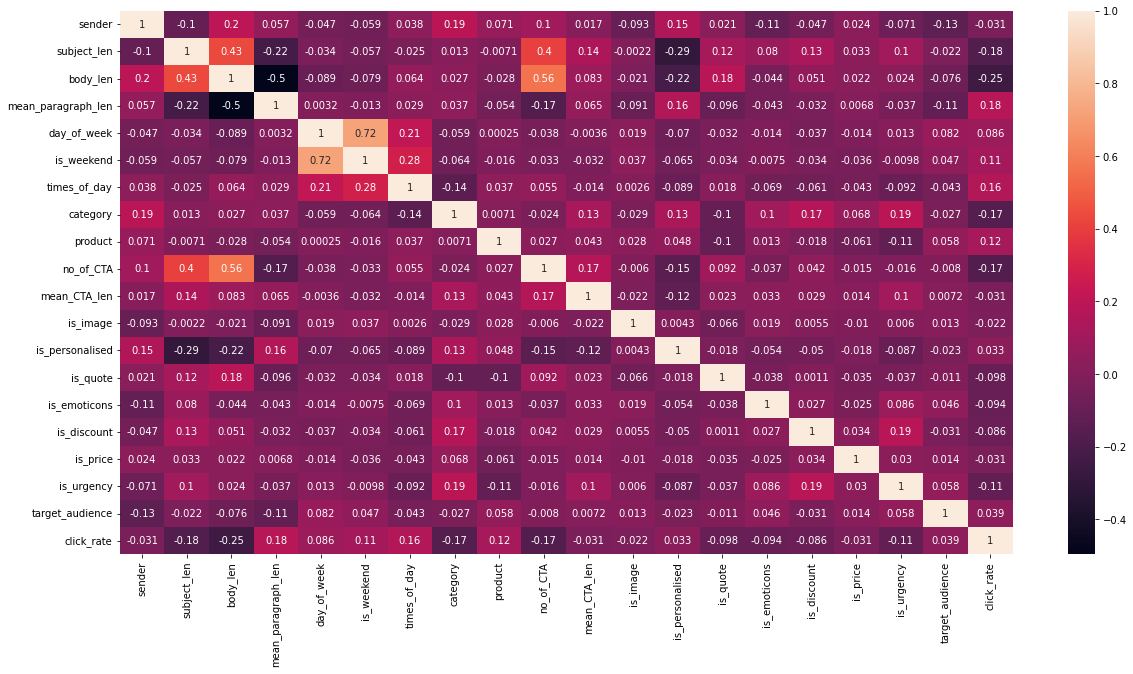

In [23]:
plt.figure(figsize= (20,10), facecolor="white")
sns.heatmap(df_train.drop(columns = ["is_timer"]).corr(), annot = True)

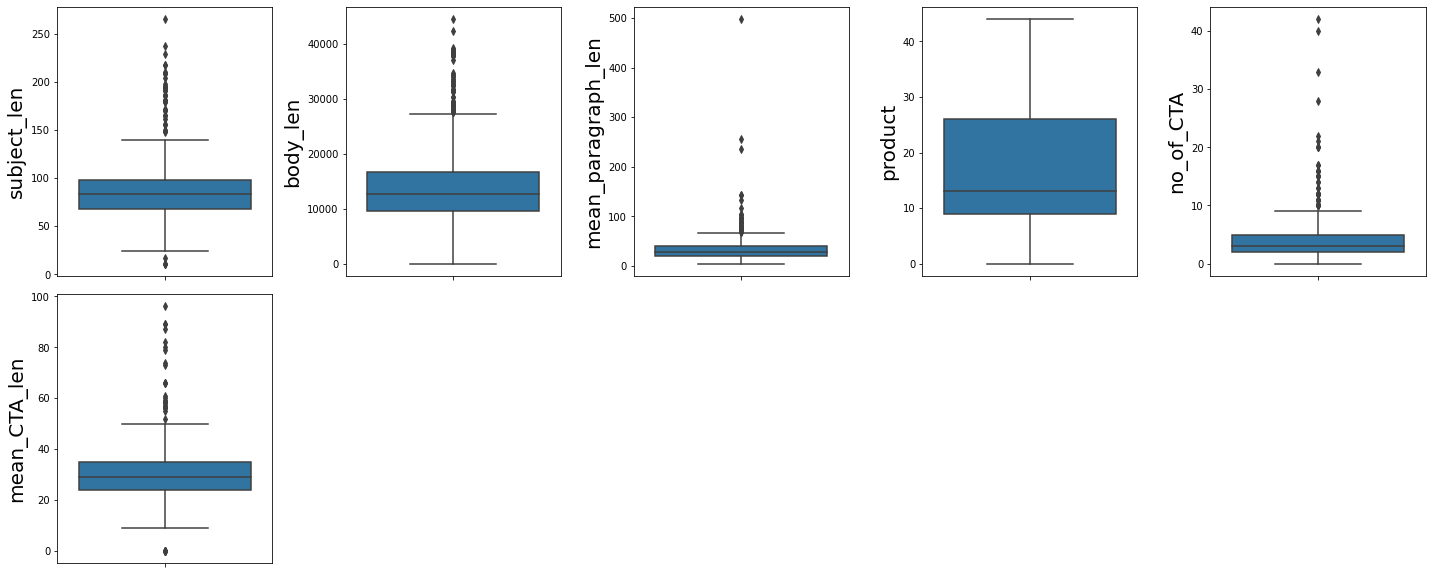

In [24]:
plt.figure(figsize= (20,20), facecolor="white")
plotnumber= 1
columns = ["subject_len","body_len","mean_paragraph_len","product","no_of_CTA","mean_CTA_len"]
for column in columns:
    ax = plt.subplot(5,5, plotnumber)
    sns.boxplot(y = column, data = df_test)
    plt.ylabel(column, fontsize = 20)
    plotnumber += 1

plt.tight_layout()

## __Data Cleaning__

* __Outliers in Train Dataset__

In [25]:
q = df_train["no_of_CTA"].quantile(.975)
df_train = df_train[df_train["no_of_CTA"]<q]
df_train.shape

(1836, 21)

* __Removing Outliers by deleting all those value which are greater than 97.5 percent quantile of no_of_CTA feature__

In [26]:
x = df_train.drop(columns=["click_rate"])
y = df_train["click_rate"]

* __Separate the Independent and Dependent variable__

In [27]:
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.10,random_state=207)

* __Now spliting the Train dataset into training and testing for model building. Spliting Train Dataset into .90:.10 where 90% is of training and 10 is of testing__

## __Model Building__ 

1. __Linear Regression__

In [28]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = linear_model.predict(x_valid)
("r2 score:- ",r2_score(y_valid, y_pred))

('r2 score:- ', 0.17680312637178608)

In [30]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [31]:
# best alpha parameter
alpha = lassocv.alpha_
alpha

3.1751607808016884e-05

In [32]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.1751607808016884e-05)

In [33]:
lasso_reg.score(x_valid,y_valid)

0.1765254120750145

In [34]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them
alphas=np.random.uniform(low=0,high=10,size=(50,))
ridge_cv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridge_cv.fit(x_train,y_train)

RidgeCV(alphas=array([9.07701862, 2.24550813, 5.24487041, 0.26161335, 7.52068947,
       1.95353182, 8.64680966, 5.79858889, 7.6223386 , 6.0675862 ,
       7.94178647, 9.7884166 , 2.49907828, 6.89718552, 4.31561795,
       2.14405397, 7.46082683, 5.14704016, 3.34624009, 7.29743415,
       3.26080686, 8.6279623 , 2.39611006, 4.13314411, 2.5220199 ,
       9.63937026, 1.45261203, 9.60207887, 6.86800062, 9.58558531,
       4.78806395, 5.56928527, 0.93333212, 6.74875352, 4.26238336,
       9.50976038, 0.56229826, 9.69164005, 7.27224755, 1.01044113,
       2.46268674, 7.25510643, 2.88727999, 6.91527931, 0.60108906,
       9.77577401, 5.61609454, 9.89814913, 1.18042975, 3.71604992]),
        cv=10, normalize=True)

In [35]:
#best possible alpha value
ridge_cv.alpha_

0.26161335466035385

In [36]:
ridge_model=Ridge(alpha=ridge_cv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.26161335466035385)

In [37]:
ridge_model.score(x_valid  ,y_valid)

0.1767918830234695

2. __XGB Boost Regression__

In [38]:
# for i in range(1, 500):
#     x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.10,random_state=i)
#     for j in range  (100,700):
#         xgb_model_1 = xgb.XGBRegressor(learning_rate = .02231, n_estimators = j, max_depth = 7)
#         xgb_model_1.fit(x_train,y_train)
#         a = xgb_model_1.score(x_train,y_train)
#         b = xgb_model_1.score(x_valid,y_valid)
#         if a > .75 and b > .75:
#             print(a,b,i)

* __Through below code we have find the best random_state and n_estimators value__

In [39]:
xgb_model = xgb.XGBRegressor(learning_rate = .0252, n_estimators = 690,max_depth = 7)
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.0252, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=690, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [40]:
y_pred = xgb_model.predict(x_valid)
print("R2 score:- ", r2_score(y_valid, y_pred))

R2 score:-  0.8323908719174495


3. __Gradient Boosting Regression__

In [41]:
gb_parameters = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
                         'n_estimators':[100,250,500,750,1000,1250,1500,1750],
                         'max_depth':[2,3,4,5,6,7],
                         'min_samples_split':[2,4,6,8,10,20,40,60,100],
                         'min_samples_leaf':[1,3,5,7,9],
                         'max_features':[2,3,4,5,6,7],
                         'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]
                        }

In [42]:
gb_reg = GradientBoostingRegressor()
random_gb = RandomizedSearchCV(estimator=gb_reg,
                                        param_distributions=gb_parameters,
                                        cv=5,
                                        scoring='neg_root_mean_squared_error',
                                        n_iter=10,
                                        n_jobs=-1,
                                        verbose=2,
                                        random_state=101
                                        )
random_gb.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.15, 0.1, 0.05, 0.01,
                                                          0.005, 0.001],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 3, 5, 7, 9],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              20, 40, 60, 100],
                                        'n_estimators': [100, 250, 500, 750,
                                                         1000, 1250, 1500,
                                                         1750],
                                        'subsample': [0.7, 0.75, 0.8, 0.85, 0.9,
                                                      0.95, 1]},
                   random_state=101, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [43]:
best_param = random_gb.best_params_
gb_model = GradientBoostingRegressor(subsample = best_param['subsample'],
                                                n_estimators = 300,
                                                min_samples_split = best_param['min_samples_split'],
                                                min_samples_leaf = best_param['min_samples_leaf'],
                                                max_features = best_param['max_features'],
                                                max_depth = best_param['max_depth'],
                                                learning_rate = best_param['learning_rate'])
gb_model.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=6, max_features=5,
                          min_samples_leaf=5, min_samples_split=20,
                          n_estimators=300, subsample=0.85)

In [44]:
y_pred = gb_model.predict(x_valid)
print("R2 score:- ", r2_score(y_valid, y_pred))

R2 score:-  0.72784855340322


4. __Random Forest Regressor__

In [45]:
rf_parameters={'n_estimators': [100,200,300,400,500,600],
                       'max_features': ['auto', 'sqrt'],
                       'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4],
                       'bootstrap': [True, False]
                    }

In [46]:
rf_reg = RandomForestRegressor()
random_rf = RandomizedSearchCV(estimator=rf_reg,
                                        param_distributions=rf_parameters,
                                        cv=5,
                                        scoring='neg_root_mean_squared_error',
                                        n_iter=10,
                                        n_jobs=-1,
                                        verbose=2,
                                        random_state=101
                                        )
random_rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   random_state=101, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [47]:
best_param = random_rf.best_params_
rf_model = RandomForestRegressor(n_estimators = best_param['n_estimators'],
                                            min_samples_split = best_param['min_samples_split'],
                                            min_samples_leaf = best_param['min_samples_leaf'],
                                            max_features = best_param['max_features'],
                                            max_depth = best_param['max_depth'],
                                            bootstrap = best_param['bootstrap'])
rf_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      min_samples_split=5, n_estimators=500)

In [48]:
y_pred= rf_model.predict(x_valid)
print("R2 Score:- ", r2_score(y_valid, y_pred))

R2 Score:-  0.7384586916262401


## __Prediction of Test Dataset Click Rate__

In [49]:
df = pd.read_csv("test_Bk2wfZ3.csv")
df1 = pd.DataFrame()

df_test_pred = xgb_model.predict(df_test)

df1["campaign_id"] = df["campaign_id"]
df1["click_rate"] = df_test_pred

df1.head()

,campaign_id,click_rate
0,1889,0.070917
1,1890,0.448529
2,1891,0.160442
3,1892,0.162260
4,1893,0.144568


## __Save DataFrame in CSV file__

In [50]:
df1.to_csv("Email_click_rate_for_testdata_by_tusharsonp_result.csv", index = False)